In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_range = [(0,80),       # B0
              (216,266),    # B1
              (419,479),    # B2
              (622,682),    # B3
              (825,885),    # B4
              (1028,1088),  # B5
              (1231,1291),  # B6
              (1434,1494),  # B7
              (1638,1698),  # B8
              (1841,1901),  # B9
              (2045,2105),  # B10
              (2249,2319),  # B11
              (2453,2513),  # B12
              (2657,2717),  # B13
              (2861,2921),  # B14
              (3065,3125)]  # B15

In [3]:
def load_data():
    data = []
    plain = []
    for i in range(256):
        for j in range(200):
            temp = np.load("./attack_data/p" + str((i*200)+j) + ".npy")
            data.append(temp)
            plain.append(i)
    for i in range(256):
        for j in range(200):
            temp = np.load("./attack_data_2/p" + str((i*200)+j) + ".npy")
            data.append(temp)
            plain.append(i)
    del temp
    data = np.array(data)
    plain = np.array(plain)

    return data, plain

def CPA_single_byte(data, plain, first_8_bytes_key):
    correlation = np.zeros((256,len(data[0])))
    temp = np.zeros((256,256*200*2), dtype=np.uint8)
    
    for k in range(256):
        for t in range(256*200*2):
            if first_8_bytes_key == -1:
                temp[k,t] = np.bitwise_xor(plain[t],k)
            else:
                temp[k,t] = np.bitwise_xor(np.bitwise_xor(plain[t],first_8_bytes_key), k)
            temp[k,t] = bin(temp[k,t]).count('1')
        
        for p in range(len(data[0])):
            correlation[k,p] = np.corrcoef(temp[k,:],data[:,p])[0][1]
    return np.argmax(np.max(correlation.transpose(), axis=0)), correlation.transpose()

def CPA_attack():
    key = []
    correlations = []
    data, plain = load_data()
    for i, r in enumerate(data_range):
        if i<8:
            key_byte, corr = CPA_single_byte(data[:,r[0]:r[1]], plain, first_8_bytes_key=-1)
        else:
            key_byte, corr = CPA_single_byte(data[:,r[0]:r[1]], plain, first_8_bytes_key=key[i%8])
        key.append(key_byte)
        correlations.append(corr)
        print("Key byte ", i, ":", key_byte)

    return key, correlations

In [4]:
key, correlations = CPA_attack()

Key byte  0 : 78
Key byte  1 : 97
Key byte  2 : 74
Key byte  3 : 45
Key byte  4 : 85
Key byte  5 : 103
Key byte  6 : 82
Key byte  7 : 100
Key byte  8 : 50
Key byte  9 : 112
Key byte  10 : 88
Key byte  11 : 107
Key byte  12 : 56
Key byte  13 : 118
Key byte  14 : 53
Key byte  15 : 115


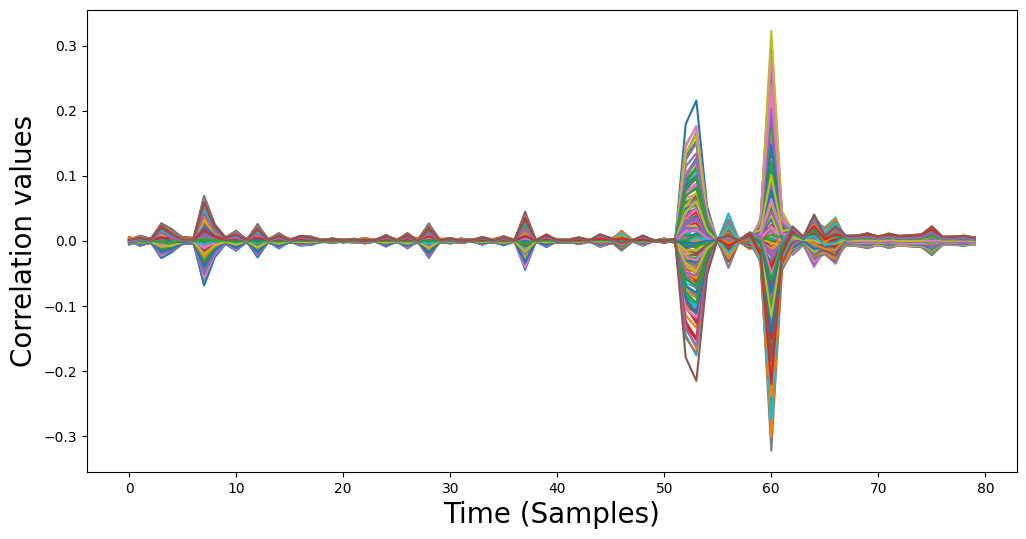

In [5]:
plt.figure(figsize=(12,6))

plt.plot(correlations[0])

plt.xlabel("Time (Samples)", fontsize=20)
plt.ylabel("Correlation values", fontsize=20)

plt.show()